### Improvements 
## IMP: Fitrar por la surface--remove events that move out of the surface on the first 3 secons
1) Remove blinks and interpolate values using cubic splines
2) Blank filtering of data---Done-- maibe explore other filter
3) Frequency analysis of the signal??
4) Remove trials with z scores over [2,-2]
5) Convert time to seconds
6) Open PLA file
7) Statistics of signal ¿How to compare surprise signals?
8) Amplitud, velocidad de cambio
9) Cut the whole signal of interest from the beggining
10) Fitrar por la surface

REfinements:
1) filter by surface
2) avoid experiments with a std too high
3) save images

### Simple pupillometry code to merge different experiments


In [10]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
import commons as cm
from data_curation import Normalization
from pandasql import sqldf
import pupillometry_commons as cp

nm=Normalization()

session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0001\SESSIONS")
sessions=[]
df_list=[]
windows_s=3
seconds_norm=0.05
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()

session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]
session_raw_list=[session_location.joinpath(session, '00 Raw_data','pupil_labs') for session in sessions ]

image_loc_list=[session_location.joinpath(session,'images_order') for session in sessions ]

for subject, recording_location in zip(sessions,session_loc_list):
    recording_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    #Load data in folders
    if len(recording_folder)>1:
        ValueError('Ambiguty in folder of experiment')
    recording_location=recording_location.joinpath(recording_folder[0],'exports')
    recording_location_raw=recording_location.joinpath(recording_folder[0],'exports')
    export_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    if len(export_folder)>1:
        ValueError('Ambiguty in folder of exports')
    recording_location=recording_location.joinpath(export_folder[0])

    gaze_surf_csv=[record for record in os.listdir(recording_location.joinpath('surfaces'))  if 'gaze_positions' in record][0]

    print(f'Analixing session: {subject}')

    exported_pupil_csv = recording_location.joinpath('pupil_positions.csv')
    pupil_pd_frame = pd.read_csv(exported_pupil_csv)
    exported_gaze_csv = os.path.join(recording_location,'gaze_positions.csv')
    gaze_pd_frame = pd.read_csv(exported_gaze_csv)
    annotations_csv = os.path.join(recording_location,'annotations.csv')
    annotations_pd = pd.read_csv(annotations_csv)
    surface_gaze_csv = os.path.join(recording_location, 'surfaces',gaze_surf_csv)
    surfaces_pd_frame = pd.read_csv(surface_gaze_csv)

    #Execute analysis
    df=cp.calculate_pupillometry(pupil_pd_frame,annotations_pd,recording_location,
                                 window_s=windows_s,
                                 seconds_norm=seconds_norm,
                                 signal_str='diameter_3d_cubic_z_score')
    df['session']=subject
    df_list.append(df)

Analixing session: ES0001_S003_PC_EM


,index,timestamp,label,duration
0,6037,7977.395531,blank_0,NaN


index                  38265
timestamp        8517.385911
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
41137,7985.288523,0,1.0,0.524156,0.371252,5.764004
41273,7985.564362,0,1.0,0.527154,0.383641,5.654514
44714,7992.504518,0,1.0,0.409597,0.352599,5.504054
49733,8002.628472,0,1.0,0.471470,0.351844,5.020330
49748,8002.660483,0,1.0,0.471294,0.351573,5.025882
49966,8003.096509,0,1.0,0.454029,0.350192,4.953761
50160,8003.492537,0,1.0,0.446656,0.344583,4.832831
50215,8003.596512,0,1.0,0.446439,0.344695,4.855533
50266,8003.704507,0,1.0,0.444015,0.343483,4.787889
50287,8003.744367,0,1.0,0.435339,0.335106,4.791681


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
38428,7979.824505,1,1.0,0.573537,0.487071,5.111649
38543,7980.052545,1,1.0,0.573727,0.483755,5.022142
38557,7980.084531,1,1.0,0.573011,0.483545,5.014035
38573,7980.116533,1,1.0,0.572303,0.483436,4.985801
38576,7980.124523,1,1.0,0.572555,0.483524,4.981245
38587,7980.140499,1,1.0,0.572331,0.483591,4.982568
38599,7980.164523,1,1.0,0.572574,0.483367,4.962626
38603,7980.172548,1,1.0,0.572772,0.483363,4.961069
38607,7980.180519,1,1.0,0.572356,0.483314,4.959116
38611,7980.188549,1,1.0,0.572836,0.483343,4.957599


sampling frequency for right eye is 125.91932552535617
sampling frequency for left eye is 124.48855842067027
Total blinks time left 293.22s and right 460.97s of a total of 537.56s left and 531.46s right
Total blinks time left 54.55% 
Total blinks time right 86.74% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 373 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S004_PC_EM


,index,timestamp,label,duration
0,3923,11754.334501,blank_0,NaN


index                  20061
timestamp       12295.135488
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
63516,11754.340611,0,1.0,0.288682,0.495558,2.437405
63520,11754.348613,0,1.0,0.288971,0.495038,2.450171
63525,11754.356764,0,1.0,0.288884,0.495607,2.429385
63528,11754.364599,0,1.0,0.288754,0.495588,2.421571
63532,11754.373140,0,1.0,0.288663,0.495674,2.417443
63536,11754.380607,0,1.0,0.288563,0.495635,2.433128
63541,11754.388602,0,1.0,0.288720,0.495763,2.437350
63542,11754.396468,0,1.0,0.288723,0.495401,2.428216
63549,11754.404478,0,1.0,0.288394,0.495677,2.440051
63551,11754.412510,0,1.0,0.288723,0.495400,2.428958


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
63515,11754.340593,1,1.0,0.650212,0.628099,3.248888
63518,11754.348510,1,1.0,0.649799,0.627784,3.226614
63523,11754.356511,1,1.0,0.649980,0.628164,3.244492
63526,11754.364473,1,1.0,0.649732,0.627974,3.225420
63531,11754.372650,1,1.0,0.650069,0.628170,3.232829
63534,11754.380602,1,1.0,0.649814,0.628588,3.231921
63538,11754.388455,1,1.0,0.649877,0.628372,3.236455
63544,11754.396597,1,1.0,0.650064,0.628219,3.228655
63546,11754.404478,1,1.0,0.650319,0.628393,3.226960
63553,11754.412610,1,1.0,0.650168,0.628724,3.233647


sampling frequency for right eye is 123.93224037995772
sampling frequency for left eye is 123.93226696367957
Total blinks time left 77.39s and right 65.16s of a total of 540.79s left and 540.79s right
Total blinks time left 14.31% 
Total blinks time right 12.05% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S006_PC_EM


,index,timestamp,label,duration
0,24426,16002.012757,blank_0,NaN


index                  56704
timestamp       16542.924445
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
23625,16002.016238,0,1.0,0.684610,0.270739,3.340827
23629,16002.024291,0,1.0,0.684198,0.270891,3.359862
23633,16002.032238,0,1.0,0.685048,0.270813,3.365668
23634,16002.040245,0,1.0,0.685137,0.270859,3.370416
23638,16002.048245,0,1.0,0.685017,0.270737,3.366939
23642,16002.056240,0,1.0,0.685283,0.270727,3.391516
23646,16002.064249,0,1.0,0.685180,0.270803,3.362005
23652,16002.072239,0,1.0,0.685324,0.270721,3.386220
23654,16002.080249,0,1.0,0.687538,0.270392,3.365709
23659,16002.088225,0,1.0,0.692840,0.268300,3.408141


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
23623,16002.016129,1,1.0,0.247607,0.708842,3.215381
23626,16002.024123,1,1.0,0.247921,0.707968,3.193202
23630,16002.032109,1,1.0,0.248153,0.708393,3.195859
23635,16002.040245,1,1.0,0.247893,0.708889,3.223085
23640,16002.048252,1,1.0,0.247955,0.708767,3.213208
23644,16002.056240,1,1.0,0.248163,0.708708,3.221459
23649,16002.064259,1,1.0,0.248394,0.708503,3.212408
23650,16002.072232,1,1.0,0.248376,0.708742,3.199455
23656,16002.080262,1,1.0,0.246866,0.708240,3.232908
23660,16002.088243,1,1.0,0.243321,0.708197,3.237670


sampling frequency for right eye is 123.93247405412919
sampling frequency for left eye is 123.92966575682624
Total blinks time left 38.08s and right 29.19s of a total of 540.90s left and 540.91s right
Total blinks time left 7.04% 
Total blinks time right 5.40% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S008_PC_EM


,index,timestamp,label,duration
0,13389,1614.779532,blank_0,NaN


index                  45617
timestamp        2154.763955
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
27830,1614.780023,0,1.0,0.213245,0.506866,4.536012
27834,1614.788109,0,1.0,0.213050,0.506579,4.492296
27838,1614.796116,0,1.0,0.213284,0.506212,4.508163
27845,1614.804138,0,1.0,0.212892,0.506704,4.474706
27847,1614.812138,0,1.0,0.213167,0.506603,4.471803
27851,1614.820116,0,1.0,0.213118,0.506408,4.493744
27855,1614.828124,0,1.0,0.212973,0.506419,4.477123
27858,1614.836172,0,1.0,0.212696,0.506413,4.497271
27863,1614.844131,0,1.0,0.213169,0.506296,4.481470
27867,1614.852167,0,1.0,0.213177,0.506070,4.496069


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
28953,1617.040123,1,1.0,0.458481,0.535414,4.001558
28954,1617.048157,1,1.0,0.457680,0.535006,4.018374
28961,1617.056139,1,1.0,0.457373,0.535257,4.003615
28965,1617.064178,1,1.0,0.456993,0.535706,4.017097
28967,1617.072165,1,1.0,0.456951,0.534752,4.000270
28972,1617.080156,1,1.0,0.457122,0.535134,3.965968
28976,1617.088183,1,1.0,0.456915,0.534894,3.975155
28980,1617.096166,1,1.0,0.456578,0.534722,3.984606
28984,1617.104153,1,1.0,0.451787,0.534181,3.962303
28989,1617.112145,1,1.0,0.447477,0.533359,3.990090


sampling frequency for right eye is 123.93144477676395
sampling frequency for left eye is 124.4523212175781
Total blinks time left 59.52s and right 128.43s of a total of 537.72s left and 539.98s right
Total blinks time left 11.07% 
Total blinks time right 23.79% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 373 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S009_PC_EM


,index,timestamp,label,duration
0,4076,2626.094032,blank_0,NaN


index                  36304
timestamp        3166.080345
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
25049,2626.099618,0,1.0,0.357550,0.449578,6.075125
25053,2626.107542,0,1.0,0.357289,0.449518,6.061121
25056,2626.115551,0,1.0,0.357335,0.449386,6.060531
25060,2626.123700,0,1.0,0.356909,0.449596,6.047104
25066,2626.131698,0,1.0,0.356709,0.449614,6.057957
25070,2626.139699,0,1.0,0.356572,0.449660,6.048162
25074,2626.147706,0,1.0,0.356518,0.449467,6.060221
25079,2626.155818,0,1.0,0.356368,0.449506,6.071671
25080,2626.163768,0,1.0,0.356210,0.449741,6.023358
25086,2626.171766,0,1.0,0.356112,0.449956,6.025245


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
25050,2626.099711,1,1.0,0.484378,0.568390,5.904833
25054,2626.107695,1,1.0,0.484457,0.568368,5.935491
25059,2626.115720,1,1.0,0.484620,0.568568,5.946328
25063,2626.123732,1,1.0,0.484306,0.568494,5.899660
25065,2626.131666,1,1.0,0.484370,0.568530,5.900043
25069,2626.139542,1,1.0,0.484418,0.568558,5.901249
25072,2626.147643,1,1.0,0.484057,0.568398,5.918851
25076,2626.155783,1,1.0,0.484102,0.568468,5.914647
25083,2626.163770,1,1.0,0.484241,0.568365,5.897807
25085,2626.171730,1,1.0,0.484250,0.568327,5.921677


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.92507608089832
sampling frequency for left eye is 123.93065319184159
Total blinks time left 70.11s and right 53.28s of a total of 539.98s left and 539.98s right
Total blinks time left 12.98% 
Total blinks time right 9.87% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S010_PC_EM


,index,timestamp,label,duration
0,11749,6403.109787,blank_0,NaN


index                  43949
timestamp         6943.54162
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
29984,6403.111934,0,1.0,0.432535,0.554127,3.974446
29988,6403.120056,0,1.0,0.432474,0.554321,3.976231
29993,6403.127951,0,1.0,0.432475,0.554315,3.976127
29999,6403.136094,0,1.0,0.432478,0.554348,3.974705
30002,6403.144059,0,1.0,0.432444,0.554184,3.971793
30006,6403.152152,0,1.0,0.432455,0.554279,3.971644
30010,6403.160069,0,1.0,0.432376,0.554387,3.970153
30015,6403.168037,0,1.0,0.432340,0.554543,3.964507
30018,6403.176068,0,1.0,0.432498,0.554522,3.966003
30022,6403.184073,0,1.0,0.432660,0.554543,3.960231


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
30265,6403.676054,1,1.0,0.340287,0.287047,3.751792
30268,6403.684052,1,1.0,0.337619,0.287674,3.778888
30273,6403.692063,1,1.0,0.338217,0.286997,3.796237
30279,6403.700037,1,1.0,0.337436,0.285952,3.822319
30283,6403.708032,1,1.0,0.337121,0.286015,3.818006
30286,6403.716033,1,1.0,0.337343,0.285976,3.811419
30288,6403.724092,1,1.0,0.337388,0.285946,3.812174
30292,6403.732088,1,1.0,0.336789,0.285826,3.812790
30296,6403.740102,1,1.0,0.336688,0.285816,3.825749
30302,6403.748099,1,1.0,0.336227,0.285608,3.819050


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.98281749804983
sampling frequency for left eye is 124.05820587109346
Total blinks time left 232.65s and right 306.19s of a total of 539.86s left and 540.17s right
Total blinks time left 43.09% 
Total blinks time right 56.68% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S011_PC_EM


,index,timestamp,label,duration
0,3563,3047.882941,blank_0,NaN


index                  35860
timestamp          3589.0257
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26167,3047.885142,0,1.0,0.435886,0.286198,3.586937
26171,3047.893111,0,1.0,0.435710,0.286139,3.598475
26174,3047.901167,0,1.0,0.435649,0.286374,3.605026
26178,3047.909144,0,1.0,0.435968,0.286272,3.603285
26182,3047.917134,0,1.0,0.435830,0.286404,3.585380
26187,3047.925119,0,1.0,0.435914,0.286045,3.588965
26190,3047.933123,0,1.0,0.435827,0.286349,3.586342
26194,3047.941113,0,1.0,0.435879,0.286139,3.595971
26198,3047.949125,0,1.0,0.435816,0.286413,3.594684
26203,3047.957124,0,1.0,0.436207,0.286488,3.591324


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26173,3047.897200,1,1.0,0.629461,0.520159,2.638997
26233,3048.017123,1,1.0,0.629248,0.519712,2.650432
26276,3048.105136,1,1.0,0.629001,0.519696,2.656216
26285,3048.121147,1,1.0,0.629195,0.519488,2.657083
26380,3048.317142,1,1.0,0.627569,0.521767,2.642507
26384,3048.325132,1,1.0,0.624793,0.524192,2.655082
26388,3048.333172,1,1.0,0.624661,0.526891,2.634592
26392,3048.341123,1,1.0,0.624855,0.527691,2.645713
26400,3048.357144,1,1.0,0.624599,0.527149,2.649306
26416,3048.389179,1,1.0,0.624788,0.527101,2.643320


sampling frequency for right eye is 123.93216773192913
sampling frequency for left eye is 123.93401368284813
Total blinks time left 266.98s and right 25.50s of a total of 541.13s left and 541.13s right
Total blinks time left 49.34% 
Total blinks time right 4.71% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S012_PC_EM


,index,timestamp,label,duration
0,2750,5236.08809,blank_0,NaN


index                  34995
timestamp        5776.977738
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
18235,5236.092010,0,1.0,0.228888,0.389187,4.163835
18238,5236.100018,0,1.0,0.228817,0.388956,4.173220
18242,5236.108021,0,1.0,0.228360,0.389504,4.181568
18246,5236.120009,0,1.0,0.228467,0.389089,4.186757
18252,5236.128222,0,1.0,0.228325,0.389450,4.190155
18254,5236.136025,0,1.0,0.228313,0.389544,4.184396
18261,5236.144206,0,1.0,0.228339,0.389424,4.183189
18263,5236.152027,0,1.0,0.228261,0.389383,4.178732
18266,5236.160069,0,1.0,0.228225,0.389437,4.188886
18272,5236.168255,0,1.0,0.228521,0.389367,4.193005


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
18236,5236.096011,1,1.0,0.537553,0.807891,4.167794
18241,5236.104033,1,1.0,0.537943,0.808290,4.192330
18244,5236.112009,1,1.0,0.537045,0.807318,4.140424
18249,5236.120011,1,1.0,0.536482,0.807199,4.125888
18250,5236.128031,1,1.0,0.536231,0.806726,4.124539
18257,5236.136054,1,1.0,0.536179,0.806896,4.124323
18259,5236.144179,1,1.0,0.536355,0.806820,4.138392
18265,5236.152047,1,1.0,0.536237,0.806888,4.143665
18270,5236.168252,1,1.0,0.536204,0.806640,4.177858
18277,5236.176094,1,1.0,0.536176,0.806762,4.187037


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.90209274232477
sampling frequency for left eye is 123.9288811365415
Total blinks time left 62.48s and right 60.28s of a total of 540.87s left and 540.88s right
Total blinks time left 11.55% 
Total blinks time right 11.15% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S013_PC_EM


,index,timestamp,label,duration
0,5673,3600.426023,blank_0,NaN


index                  37900
timestamp        4140.408458
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
43485,3600.432152,0,1.0,0.419532,0.363336,2.774014
43488,3600.440175,0,1.0,0.419253,0.363066,2.770467
43493,3600.448216,0,1.0,0.418938,0.362923,2.757984
43495,3600.456160,0,1.0,0.419338,0.362911,2.768987
43501,3600.464160,0,1.0,0.419630,0.363108,2.771814
43504,3600.472155,0,1.0,0.419239,0.362790,2.765781
43509,3600.480161,0,1.0,0.419245,0.363109,2.770590
43512,3600.488139,0,1.0,0.419176,0.362770,2.763009
43515,3600.496158,0,1.0,0.419175,0.362813,2.766497
43519,3600.504165,0,1.0,0.419246,0.362884,2.763113


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
43483,3600.432132,1,1.0,0.404575,0.670827,2.253109
43487,3600.440124,1,1.0,0.404494,0.670947,2.261014
43498,3600.464124,1,1.0,0.404870,0.670864,2.321522
43502,3600.472114,1,1.0,0.404755,0.670970,2.321329
43507,3600.480128,1,1.0,0.404794,0.670721,2.309566
43511,3600.488111,1,1.0,0.404650,0.670834,2.310458
43516,3600.500126,1,1.0,0.405018,0.671087,2.320295
43520,3600.508126,1,1.0,0.405087,0.670776,2.323188
43524,3600.516125,1,1.0,0.405127,0.671186,2.320886
43529,3600.524112,1,1.0,0.405067,0.670994,2.320575


sampling frequency for right eye is 123.93235686772545
sampling frequency for left eye is 123.93145556387111
Total blinks time left 175.85s and right 13.31s of a total of 539.98s left and 539.97s right
Total blinks time left 32.57% 
Total blinks time right 2.47% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S017_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,2870,23771.222563,blank_0,NaN


index                  35097
timestamp       24311.211911
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
18830,23771.225211,0,1.0,0.267986,0.565919,4.694580
18833,23771.233086,0,1.0,0.267874,0.565878,4.680262
18837,23771.241051,0,1.0,0.267757,0.565880,4.692695
18840,23771.249083,0,1.0,0.267805,0.565810,4.678139
18844,23771.257085,0,1.0,0.267674,0.565929,4.681934
18848,23771.265056,0,1.0,0.267443,0.565922,4.695611
18853,23771.273050,0,1.0,0.267588,0.565847,4.702483
18857,23771.281115,0,1.0,0.267197,0.565648,4.683630
18860,23771.289073,0,1.0,0.266958,0.565715,4.687342
18864,23771.297254,0,1.0,0.267360,0.565802,4.694848


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
18829,23771.225210,1,1.0,0.468537,0.536155,5.401868
18834,23771.233187,1,1.0,0.468647,0.536142,5.424041
18839,23771.241186,1,1.0,0.468457,0.536092,5.396335
18843,23771.249232,1,1.0,0.468512,0.536299,5.431327
18847,23771.257224,1,1.0,0.468673,0.536367,5.428387
18850,23771.265182,1,1.0,0.468505,0.536379,5.428999
18855,23771.273187,1,1.0,0.468838,0.536375,5.429643
18858,23771.281118,1,1.0,0.468727,0.536268,5.423133
18862,23771.293076,1,1.0,0.468725,0.536323,5.442664
18867,23771.301075,1,1.0,0.468927,0.536328,5.418044


sampling frequency for right eye is 123.93235891447502
sampling frequency for left eye is 123.93509453854392
Total blinks time left 99.71s and right 133.11s of a total of 539.97s left and 539.98s right
Total blinks time left 18.47% 
Total blinks time right 24.65% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S018_PC_EM


,index,timestamp,label,duration
0,5689,30085.311756,blank_0,NaN


index                  37917
timestamp       30625.288812
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
42754,30085.313892,0,1.0,0.307046,0.423035,3.675615
42758,30085.321925,0,1.0,0.306761,0.422796,3.653631
42762,30085.329877,0,1.0,0.306865,0.423087,3.645336
42767,30085.337900,0,1.0,0.306765,0.422491,3.651955
42774,30085.353899,0,1.0,0.306905,0.422976,3.634589
42779,30085.361878,0,1.0,0.307014,0.422792,3.650449
42783,30085.369894,0,1.0,0.306855,0.422691,3.649761
42786,30085.377896,0,1.0,0.306800,0.422657,3.633986
42790,30085.385938,0,1.0,0.306859,0.422880,3.645213
42795,30085.393936,0,1.0,0.306793,0.422847,3.631880


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
42804,30085.413762,1,1.0,0.481985,0.582270,4.115228
42808,30085.421758,1,1.0,0.481794,0.582222,4.105977
42813,30085.429842,1,1.0,0.481888,0.582313,4.108846
42817,30085.437811,1,1.0,0.481920,0.582218,4.114010
42848,30085.502051,1,1.0,0.481892,0.582038,4.114132
42869,30085.541925,1,1.0,0.482227,0.582460,4.117879
42882,30085.573928,1,1.0,0.482198,0.582257,4.109043
42887,30085.581894,1,1.0,0.481957,0.582068,4.114846
42893,30085.589931,1,1.0,0.481857,0.582181,4.104946
42903,30085.613813,1,1.0,0.481883,0.582423,4.121557


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.93234194916906
sampling frequency for left eye is 123.96170241928505
Total blinks time left 161.80s and right 325.50s of a total of 539.84s left and 539.97s right
Total blinks time left 29.97% 
Total blinks time right 60.28% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S019_PC_EM


,index,timestamp,label,duration
0,4181,4215.016075,blank_0,NaN


index                  36408
timestamp        4755.012764
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
28977,4215.026349,0,1.0,0.148400,0.545338,4.212471
28985,4215.042323,0,1.0,0.148217,0.544005,4.248275
28989,4215.050398,0,1.0,0.148190,0.543613,4.251720
28992,4215.058333,0,1.0,0.148430,0.542368,4.256600
28996,4215.066327,0,1.0,0.148386,0.542707,4.270958
29003,4215.082319,0,1.0,0.149034,0.542473,4.246801
29009,4215.090341,0,1.0,0.148560,0.542033,4.266428
29013,4215.098308,0,1.0,0.148725,0.541459,4.251420
29017,4215.106343,0,1.0,0.149101,0.541149,4.261700
29019,4215.114337,0,1.0,0.148610,0.541175,4.254809


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
28975,4215.026335,1,1.0,0.672588,0.703961,5.408018
29083,4215.242211,1,1.0,0.672845,0.705179,5.481101
29500,4216.082339,1,1.0,0.620163,0.665402,5.169044
29506,4216.098271,1,1.0,0.623108,0.663579,5.151506
29533,4216.146352,1,1.0,0.624114,0.664370,5.142475
29545,4216.170245,1,1.0,0.624156,0.664622,5.138449
29550,4216.186250,1,1.0,0.624067,0.664761,5.145407
29564,4216.210350,1,1.0,0.624748,0.665293,5.127219
29572,4216.226477,1,1.0,0.624565,0.665297,5.110610
29574,4216.234259,1,1.0,0.624418,0.665224,5.127340


sampling frequency for right eye is 123.92520299430477
sampling frequency for left eye is 123.93442933466798
Total blinks time left 484.53s and right 143.72s of a total of 539.98s left and 539.98s right
Total blinks time left 89.73% 
Total blinks time right 26.62% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S020_PC_EM


,index,timestamp,label,duration
0,7625,9572.150979,blank_0,NaN


index                  39854
timestamp       10112.144156
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
29719,9572.169202,0,1.0,0.324405,0.534213,6.253656
29731,9572.193114,0,1.0,0.324547,0.533762,6.242186
29758,9572.249205,0,1.0,0.324346,0.534391,6.250127
29762,9572.257196,0,1.0,0.324348,0.534489,6.251022
29771,9572.273236,0,1.0,0.324532,0.534570,6.253679
29779,9572.289197,0,1.0,0.324260,0.534487,6.252661
29786,9572.305190,0,1.0,0.324429,0.534535,6.251123
29790,9572.317067,0,1.0,0.324724,0.534523,6.260817
29811,9572.357182,0,1.0,0.324531,0.534123,6.255196
29818,9572.373185,0,1.0,0.324623,0.534170,6.246114


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
29753,9572.237214,1,1.0,0.410697,0.409990,4.678681
29764,9572.261283,1,1.0,0.411005,0.409822,4.671783
29798,9572.333201,1,1.0,0.410769,0.409980,4.680658
29832,9572.397243,1,1.0,0.411086,0.410369,4.662371
29856,9572.445203,1,1.0,0.414414,0.401879,4.656652
29872,9572.477340,1,1.0,0.415122,0.399138,4.649022
30119,9572.977231,1,1.0,0.414299,0.399188,4.630336
30173,9573.085216,1,1.0,0.414492,0.399084,4.626332
30225,9573.189192,1,1.0,0.414579,0.399286,4.631597
30269,9573.277209,1,1.0,0.415150,0.399138,4.638862


sampling frequency for right eye is 123.97295546251496
sampling frequency for left eye is 123.95094581632272
Total blinks time left 49.63s and right 161.87s of a total of 539.90s left and 539.79s right
Total blinks time left 9.19% 
Total blinks time right 29.99% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S022_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,6231,21605.402144,blank_0,NaN


index                  38467
timestamp       22145.537089
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
27765,21605.408741,0,1.0,0.284626,0.389995,3.382902
27768,21605.416753,0,1.0,0.284369,0.390273,3.376803
27772,21605.424743,0,1.0,0.284869,0.389900,3.378112
27777,21605.432794,0,1.0,0.284316,0.390457,3.381869
27781,21605.440737,0,1.0,0.284666,0.389829,3.381178
27784,21605.448756,0,1.0,0.284084,0.390367,3.358883
27789,21605.456747,0,1.0,0.284421,0.390444,3.378102
27795,21605.468776,0,1.0,0.284084,0.390084,3.350436
27798,21605.476735,0,1.0,0.284299,0.389967,3.375322
27800,21605.484744,0,1.0,0.284280,0.389817,3.361320


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
27762,21605.404760,1,1.0,0.481373,0.650023,3.854079
27767,21605.412763,1,1.0,0.481700,0.649529,3.835313
27771,21605.420751,1,1.0,0.481426,0.649610,3.854716
27774,21605.428784,1,1.0,0.481407,0.649611,3.857699
27778,21605.436758,1,1.0,0.481650,0.649172,3.859017
27782,21605.444750,1,1.0,0.481189,0.649116,3.826485
27787,21605.452777,1,1.0,0.480952,0.649187,3.836398
27791,21605.460620,1,1.0,0.480807,0.648455,3.843133
27793,21605.468615,1,1.0,0.480856,0.648919,3.836189
27797,21605.476629,1,1.0,0.480896,0.648438,3.841331


sampling frequency for right eye is 123.92823997814095
sampling frequency for left eye is 123.93008313418737
Total blinks time left 90.56s and right 75.91s of a total of 540.13s left and 540.13s right
Total blinks time left 16.77% 
Total blinks time right 14.05% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S023_PC_EM


,index,timestamp,label,duration
0,20529,30746.082315,blank_0,NaN


index                  52809
timestamp       31286.967956
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
25657,30746.085206,0,1.0,0.339124,0.415432,4.077717
25660,30746.093188,0,1.0,0.339189,0.415627,4.076075
25664,30746.101164,0,1.0,0.338688,0.415561,4.056485
25669,30746.109187,0,1.0,0.338817,0.415599,4.061640
25673,30746.117179,0,1.0,0.338573,0.415404,4.055599
25677,30746.125185,0,1.0,0.338734,0.415295,4.049459
25681,30746.133204,0,1.0,0.338778,0.415468,4.047166
25685,30746.141207,0,1.0,0.338386,0.415334,4.051296
25689,30746.149221,0,1.0,0.338610,0.415446,4.055237
25692,30746.161054,0,1.0,0.338402,0.415565,4.053306


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
25658,30746.089041,1,1.0,0.434466,0.596005,4.512320
25663,30746.097169,1,1.0,0.434524,0.596043,4.517233
25666,30746.105019,1,1.0,0.434588,0.596116,4.512038
25670,30746.113024,1,1.0,0.434841,0.596303,4.491538
25675,30746.121023,1,1.0,0.434730,0.596223,4.499851
25679,30746.129016,1,1.0,0.434926,0.596301,4.490645
25683,30746.137143,1,1.0,0.435001,0.596553,4.482109
25686,30746.145021,1,1.0,0.435015,0.596400,4.481473
25690,30746.153034,1,1.0,0.434998,0.596266,4.490062
25694,30746.161172,1,1.0,0.434731,0.595996,4.509276


sampling frequency for right eye is 124.08206694722719
sampling frequency for left eye is 123.93246634593426
Total blinks time left 172.20s and right 180.89s of a total of 540.88s left and 540.22s right
Total blinks time left 31.84% 
Total blinks time right 33.48% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S024_PC_EM


,index,timestamp,label,duration
0,4006,6067.756932,blank_0,NaN


index                  36234
timestamp        6607.750312
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26946,6067.758305,0,1.0,0.450920,0.433232,4.346266
26950,6067.766276,0,1.0,0.451212,0.433131,4.355639
26954,6067.774295,0,1.0,0.451257,0.432859,4.364024
26958,6067.782198,0,1.0,0.451293,0.432948,4.364615
26962,6067.790189,0,1.0,0.451294,0.432568,4.359343
26966,6067.798197,0,1.0,0.451105,0.432747,4.360388
26970,6067.806154,0,1.0,0.451023,0.432901,4.356136
26974,6067.814233,0,1.0,0.451134,0.432183,4.367269
26978,6067.822279,0,1.0,0.451015,0.432742,4.377519
26982,6067.830187,0,1.0,0.451095,0.432335,4.369494


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26949,6067.762275,1,1.0,0.446569,0.457980,4.360013
26953,6067.770273,1,1.0,0.446736,0.457797,4.351802
26960,6067.786163,1,1.0,0.446787,0.458051,4.364897
26965,6067.794152,1,1.0,0.446731,0.457863,4.360782
26968,6067.802287,1,1.0,0.446695,0.458096,4.374876
26972,6067.810144,1,1.0,0.446409,0.457985,4.374529
26977,6067.818153,1,1.0,0.446187,0.458270,4.385975
26981,6067.826172,1,1.0,0.446704,0.458164,4.378388
26989,6067.842339,1,1.0,0.446911,0.458204,4.378041
26992,6067.850167,1,1.0,0.446593,0.458097,4.396063


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.93226135414996
sampling frequency for left eye is 123.93223796131947
Total blinks time left 38.76s and right 39.02s of a total of 539.98s left and 539.99s right
Total blinks time left 7.18% 
Total blinks time right 7.23% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S025_PC_EM


,index,timestamp,label,duration
0,22584,10760.888059,blank_0,NaN


index                  54809
timestamp       11300.860597
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26956,10760.910901,0,1.0,0.614965,0.686995,2.395908
26960,10760.918882,0,1.0,0.615230,0.686991,2.412694
26968,10760.934774,0,1.0,0.614913,0.686712,2.384029
26973,10760.942756,0,1.0,0.614695,0.687072,2.404576
26992,10760.982869,0,1.0,0.615139,0.686766,2.386963
27008,10761.014875,0,1.0,0.615093,0.686865,2.397291
27012,10761.022880,0,1.0,0.614987,0.687258,2.417748
27018,10761.038842,0,1.0,0.615175,0.687070,2.387552
27024,10761.046864,0,1.0,0.614909,0.687580,2.373119
27027,10761.054810,0,1.0,0.615419,0.687085,2.382236


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26947,10760.890840,1,1.0,0.558069,0.560846,2.364782
26954,10760.906848,1,1.0,0.557940,0.561083,2.379628
26959,10760.914695,1,1.0,0.558274,0.561112,2.361689
26962,10760.922784,1,1.0,0.557807,0.560928,2.377216
26975,10760.946688,1,1.0,0.557982,0.560471,2.350385
26979,10760.958689,1,1.0,0.557932,0.560769,2.360600
26983,10760.966674,1,1.0,0.558185,0.560710,2.358574
27029,10761.054837,1,1.0,0.558166,0.560794,2.355827
27032,10761.062898,1,1.0,0.558139,0.560434,2.351435
27035,10761.070801,1,1.0,0.558176,0.561107,2.373660


sampling frequency for right eye is 123.93590949440907
sampling frequency for left eye is 123.93130890848524
Total blinks time left 36.75s and right 90.56s of a total of 539.97s left and 539.95s right
Total blinks time left 6.81% 
Total blinks time right 16.77% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S026_PC_EM


,index,timestamp,label,duration
0,3581,15386.923649,blank_0,NaN


index                  35861
timestamp       15927.785658
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
30140,15386.927341,0,1.0,0.732967,0.166361,3.959719
30145,15386.935293,0,1.0,0.733013,0.166150,3.958528
30151,15386.943298,0,1.0,0.733041,0.166502,3.950947
30153,15386.951298,0,1.0,0.733092,0.166163,3.953841
30156,15386.959285,0,1.0,0.732686,0.166538,3.982265
30160,15386.967289,0,1.0,0.733014,0.165933,3.964569
30164,15386.975276,0,1.0,0.733481,0.165845,3.981747
30168,15386.983293,0,1.0,0.733078,0.166100,3.973955
30174,15386.991307,0,1.0,0.733246,0.165959,3.994849
30176,15386.999287,0,1.0,0.733136,0.166243,3.976572


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
30143,15386.927422,1,1.0,0.419015,0.785469,4.028460
30146,15386.935302,1,1.0,0.418607,0.785183,4.011116
30150,15386.943298,1,1.0,0.419333,0.785252,4.021868
30154,15386.951301,1,1.0,0.418986,0.785510,4.036791
30158,15386.959293,1,1.0,0.418598,0.784941,4.001279
30162,15386.967395,1,1.0,0.418622,0.785431,4.002118
30166,15386.975281,1,1.0,0.418433,0.785148,4.012376
30170,15386.983304,1,1.0,0.418786,0.785372,3.982715
30175,15386.991307,1,1.0,0.418914,0.785504,4.005214
30178,15386.999288,1,1.0,0.418440,0.785470,3.987817


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.95966368189208
sampling frequency for left eye is 124.11204606210828
Total blinks time left 138.66s and right 97.28s of a total of 540.06s left and 540.73s right
Total blinks time left 25.67% 
Total blinks time right 17.99% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S027_PC_EM


,index,timestamp,label,duration
0,5596,2786.052314,blank_0,NaN


index                  37825
timestamp        3326.064992
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
43138,2786.966385,0,1.0,0.348965,0.473182,4.762235
43162,2787.014252,0,1.0,0.349570,0.471884,4.780977
43563,2787.822256,0,1.0,0.487049,0.274877,5.111726
43627,2787.950407,0,1.0,0.487588,0.239454,5.145160
43631,2787.958376,0,1.0,0.486942,0.239541,5.127804
43638,2787.974258,0,1.0,0.487205,0.238303,5.150081
43646,2787.990370,0,1.0,0.487419,0.237934,5.151620
43650,2787.998228,0,1.0,0.487246,0.237851,5.149666
43654,2788.006251,0,1.0,0.487349,0.237759,5.151744
43659,2788.014277,0,1.0,0.487210,0.237473,5.148446


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
42999,2786.686375,1,1.0,0.369398,0.478478,4.678458
43248,2787.186395,1,1.0,0.289199,0.468150,4.776359
43257,2787.202367,1,1.0,0.289152,0.468079,4.800222
43276,2787.246398,1,1.0,0.289329,0.468340,4.784526
43280,2787.254437,1,1.0,0.287960,0.467142,4.804102
43389,2787.470393,1,1.0,0.265176,0.554445,4.762171
43392,2787.478374,1,1.0,0.265050,0.556058,4.839895
43424,2787.542380,1,1.0,0.264259,0.554350,4.799934
43432,2787.558372,1,1.0,0.264050,0.553830,4.805322
43452,2787.598383,1,1.0,0.263469,0.553812,4.846971


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 124.14110024663375
sampling frequency for left eye is 124.07664277482452
Total blinks time left 164.48s and right 292.70s of a total of 539.38s left and 539.10s right
Total blinks time left 30.49% 
Total blinks time right 54.29% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S028_PC_EM


,index,timestamp,label,duration
0,3483,586.934358,blank_0,NaN


index                  35775
timestamp        1127.956286
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
24882,586.938061,0,1.0,0.353577,0.378043,4.934842
24886,586.946073,0,1.0,0.353350,0.378418,4.941225
24889,586.954028,0,1.0,0.353420,0.377993,4.918942
24892,586.962039,0,1.0,0.353589,0.378085,4.911847
24897,586.970036,0,1.0,0.353429,0.378192,4.926025
24901,586.978034,0,1.0,0.353282,0.378073,4.932738
24904,586.986032,0,1.0,0.353304,0.378280,4.932588
24910,586.994024,0,1.0,0.353493,0.378277,4.923593
24912,587.002014,0,1.0,0.353473,0.378365,4.931225
24919,587.010069,0,1.0,0.353309,0.378166,4.923563


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
24885,586.946035,1,1.0,0.488043,0.471353,3.994777
24890,586.954063,1,1.0,0.488218,0.471270,3.998154
24902,586.978084,1,1.0,0.487825,0.471354,3.990438
24905,586.986032,1,1.0,0.488009,0.471383,3.996925
24909,586.994023,1,1.0,0.487853,0.471197,3.998296
24954,587.082053,1,1.0,0.487459,0.470593,3.976154
24965,587.106033,1,1.0,0.487783,0.470291,3.980593
24972,587.122029,1,1.0,0.487683,0.470090,3.982370
25034,587.246014,1,1.0,0.487477,0.469871,3.972617
25172,587.526038,1,1.0,0.486809,0.469543,3.970549


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.6904270491012
sampling frequency for left eye is 123.69225015483849
Total blinks time left 79.40s and right 28.21s of a total of 541.00s left and 541.01s right
Total blinks time left 14.68% 
Total blinks time right 5.21% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 371 correspond to 3s
Analixing session: ES0001_S029_PC_EM


,index,timestamp,label,duration
0,3435,11197.80815,blank_0,NaN


index                  35651
timestamp       11738.451173
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26312,11198.273971,0,1.0,0.321749,0.506475,6.511168
26695,11199.037990,0,1.0,0.308748,0.454728,6.572936
26700,11199.054056,0,1.0,0.308460,0.454673,6.593333
26705,11199.061955,0,1.0,0.308443,0.455031,6.570780
26721,11199.093962,0,1.0,0.308230,0.454619,6.578007
26729,11199.109967,0,1.0,0.308435,0.454333,6.589362
26735,11199.118029,0,1.0,0.307997,0.454677,6.576947
26742,11199.137957,0,1.0,0.308423,0.454525,6.552870
26763,11199.177961,0,1.0,0.308473,0.454331,6.568087
26776,11199.209952,0,1.0,0.308096,0.454237,6.586470


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26352,11198.353977,1,1.0,0.424225,0.477127,4.906283
27524,11200.717980,1,1.0,0.437933,0.513974,4.601749
27593,11200.853961,1,1.0,0.437490,0.514009,4.543281
27668,11201.005979,1,1.0,0.437549,0.514493,4.457087
27672,11201.013989,1,1.0,0.437173,0.514054,4.427667
27684,11201.037986,1,1.0,0.437656,0.514336,4.432233
27696,11201.061960,1,1.0,0.437279,0.514367,4.402034
27716,11201.105976,1,1.0,0.437008,0.514398,4.409323
27739,11201.145947,1,1.0,0.436926,0.514306,4.405268
27749,11201.169835,1,1.0,0.436497,0.514572,4.378915


sampling frequency for right eye is 124.02694465679838
sampling frequency for left eye is 124.22684101505746
Total blinks time left 372.31s and right 353.03s of a total of 539.35s left and 539.54s right
Total blinks time left 69.03% 
Total blinks time right 65.43% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 373 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

Analixing session: ES0001_S030_PC_EM


,index,timestamp,label,duration
0,4834,13698.920251,blank_0,NaN


index                  37127
timestamp       14240.031138
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_sipln

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
35234,13698.982034,0,1.0,0.449181,0.650130,4.613436
35295,13699.101998,0,1.0,0.445242,0.649446,4.620771
35331,13699.174045,0,1.0,0.445086,0.650197,4.641547
35401,13699.317870,0,1.0,0.607327,0.634492,4.660483
35404,13699.325879,0,1.0,0.607123,0.634562,4.658396
35411,13699.335200,0,1.0,0.607167,0.634799,4.656528
35413,13699.341915,0,1.0,0.606968,0.634868,4.665024
35423,13699.357985,0,1.0,0.606409,0.635246,4.690949
35426,13699.366049,0,1.0,0.606529,0.635194,4.702576
35435,13699.382109,0,1.0,0.606725,0.634917,4.674902


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
35328,13699.173829,1,1.0,0.544751,0.493693,5.718117
35332,13699.181948,1,1.0,0.544803,0.493361,5.721796
35391,13699.293958,1,1.0,0.446353,0.461781,5.663638
35393,13699.301958,1,1.0,0.445716,0.462359,5.689192
35397,13699.309968,1,1.0,0.443459,0.461057,5.708183
35407,13699.326003,1,1.0,0.442075,0.460667,5.644322
35409,13699.333968,1,1.0,0.442011,0.460934,5.647914
35415,13699.341973,1,1.0,0.442293,0.460398,5.650683
35419,13699.350204,1,1.0,0.441925,0.460353,5.655182
35420,13699.357966,1,1.0,0.441983,0.460980,5.663072


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

sampling frequency for right eye is 123.9455607734842
sampling frequency for left eye is 123.98951962037451
Total blinks time left 119.25s and right 183.29s of a total of 540.85s left and 541.04s right
Total blinks time left 22.05% 
Total blinks time right 33.88% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
Analixing session: ES0001_S031_PC_EM


,index,timestamp,label,duration
0,2945,17260.150149,blank_0,NaN


index                  35238
timestamp       17801.213507
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

eye0 (right eye) data:


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
17580,17260.177994,0,1.0,0.455363,0.383188,5.331353
17714,17260.453948,0,1.0,0.456509,0.384656,5.300960
17734,17260.493944,0,1.0,0.452585,0.358029,5.290867
17751,17260.525820,0,1.0,0.452216,0.360742,5.286560
17754,17260.533814,0,1.0,0.451735,0.360533,5.272952
17758,17260.541831,0,1.0,0.451708,0.360386,5.284558
17767,17260.557822,0,1.0,0.452309,0.360430,5.289505
17783,17260.589820,0,1.0,0.452768,0.360563,5.295006
17791,17260.605830,0,1.0,0.452816,0.360257,5.300095
17798,17260.621831,0,1.0,0.452871,0.360225,5.307664


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
20520,17266.109968,1,1.0,0.628825,0.577913,5.202748
20549,17266.165948,1,1.0,0.629681,0.576560,5.206747
20596,17266.261956,1,1.0,0.629657,0.575844,5.203038
20601,17266.269940,1,1.0,0.629350,0.575521,5.193588
20608,17266.285953,1,1.0,0.629690,0.575798,5.206616
20636,17266.341971,1,1.0,0.629877,0.576251,5.194460
20640,17266.349953,1,1.0,0.629779,0.575841,5.184082
20648,17266.369944,1,1.0,0.629799,0.575890,5.179207
20673,17266.417980,1,1.0,0.629633,0.575883,5.188756
20692,17266.457988,1,1.0,0.630278,0.575995,5.200205


sampling frequency for right eye is 123.93908144435275
sampling frequency for left eye is 125.31114976764303
Total blinks time left 408.04s and right 225.13s of a total of 535.10s left and 541.02s right
Total blinks time left 76.25% 
Total blinks time right 41.61% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 376 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

### Lets plot the figures

In [62]:
df_concat=pd.concat(df_list)
df_concat.index.name='index1'
df_concat_group=df_concat.groupby('index1')
df_concat['session'].unique()


array(['ES0001_S003_PC_EM', 'ES0001_S004_PC_EM', 'ES0001_S006_PC_EM',
       'ES0001_S008_PC_EM', 'ES0001_S009_PC_EM', 'ES0001_S010_PC_EM',
       'ES0001_S011_PC_EM', 'ES0001_S012_PC_EM', 'ES0001_S013_PC_EM',
       'ES0001_S017_PC_EM', 'ES0001_S018_PC_EM', 'ES0001_S019_PC_EM',
       'ES0001_S020_PC_EM', 'ES0001_S022_PC_EM', 'ES0001_S023_PC_EM',
       'ES0001_S024_PC_EM', 'ES0001_S025_PC_EM', 'ES0001_S026_PC_EM',
       'ES0001_S027_PC_EM', 'ES0001_S028_PC_EM', 'ES0001_S029_PC_EM',
       'ES0001_S030_PC_EM', 'ES0001_S031_PC_EM'], dtype=object)

In [63]:
window_frames=df_concat.index.max()+1#np.round(windows_s*120).astype(int)
window=range(0,window_frames)
time_x=np.linspace(0,windows_s,window_frames)

C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\4141858191.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_mean=df_concat_group.mean()
C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\4141858191.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_std=df_concat_group.std()


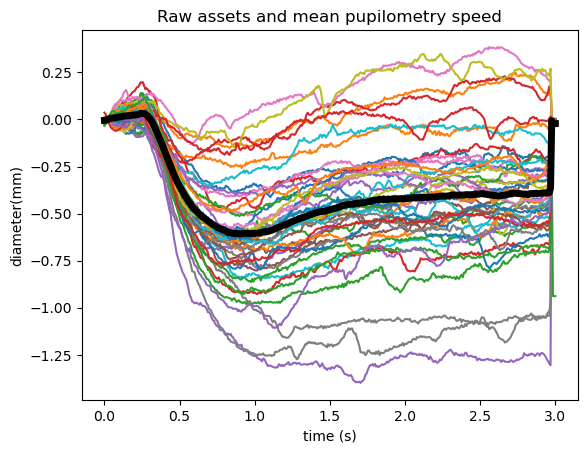

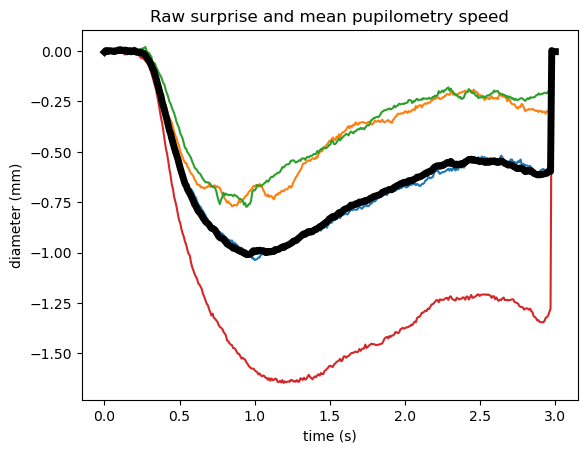

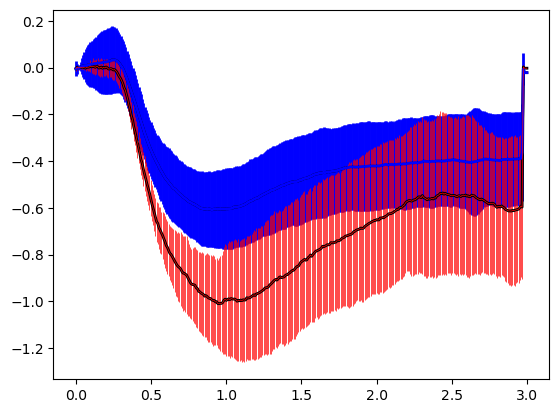

In [64]:
%matplotlib inline
df_concat_mean=df_concat_group.mean()
df_concat_std=df_concat_group.std()

filter_assets=list(df_concat_mean.columns)
filter_surprise=list(df_concat_mean.columns)

filter_assets=[asset for asset in filter_assets if 'Asset' in asset ]
filter_surprise=[asset for asset in filter_surprise if 'Surprise' in asset ]

mat=df_concat_mean.reindex(columns=filter_assets).values
mat_std=df_concat_std.reindex(columns=filter_assets).values

mat2=df_concat_mean.reindex(columns= filter_surprise).values
mat2_std=df_concat_std.reindex(columns= filter_surprise).values

fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat)
ax.plot(time_x,np.mean(mat,axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')


fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat2)
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
ax.errorbar(time_x,np.mean(mat,axis=1),np.std(mat_std,axis=1),linewidth=2,color='blue')
ax.plot(time_x,np.mean(mat,axis=1),linewidth=2,color='black')
ax.errorbar(time_x,np.mean(mat2,axis=1),np.std(mat2_std,axis=1),linewidth=0.5,color='red')
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=2,color='black')


In [65]:
pupil_events_speed=np.abs(np.diff(mat))
pupil_surprise_speed=np.abs(np.diff(mat2))

In [1]:
%matplotlib qt

pupil_events_speed
pupil_surprise_speed

fig, ax=plt.subplots(1,1)
ax.plot(time_x,pupil_events_speed[window])
ax.plot(time_x,np.mean(pupil_events_speed[window,:],axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')

fig, ax=plt.subplots(1,1)
ax.plot(time_x,pupil_surprise_speed[window,:])
ax.plot(time_x,np.mean(pupil_surprise_speed[window,:],axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
ax.plot(time_x,np.mean(pupil_surprise_speed[window,:],axis=1),linewidth=2,color='blue')
ax.plot(time_x,np.mean(pupil_events_speed[window,:],axis=1),linewidth=2,color='black')

ax.legend(['surprise','assets'])
ax.set_title('Mean pupilometry')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (s)')

NameError: name 'pupil_events_speed' is not defined

In [67]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 
filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')
time_x=np.linspace(0,2,248)
event=annotations_pd.loc[filter_events,['label']].values.flatten()
events=[image.split('.')[0] for image in event]
events

['Asset0010',
 'Asset0027',
 'Asset0018',
 'Asset0003',
 'Asset0029',
 'Asset0014',
 'Asset0041',
 'Asset0044',
 'Surprise04',
 'Asset0030',
 'Asset0006',
 'Asset0043',
 'Asset0011',
 'Asset0020',
 'Asset0039',
 'Asset0002',
 'Asset0049',
 'Asset0021',
 'Surprise01',
 'Asset0045',
 'Asset0047',
 'Asset0008',
 'Asset0004',
 'Asset0022',
 'Asset0031',
 'Asset0032',
 'Surprise02',
 'Asset0007',
 'Asset0048',
 'Asset0046',
 'Asset0033',
 'Asset0042',
 'Asset0015',
 'Asset0005',
 'Asset0036',
 'Asset0037',
 'Asset0028',
 'Surprise03',
 'Asset0050',
 'Asset0017',
 'Asset0034',
 'Asset0026',
 'Asset0035',
 'Asset0001',
 'Asset0024',
 'Asset0012',
 'Asset0016',
 'Asset0040',
 'Asset0009']

### Filter data that is inside the surface
#### Due to the fact that te gaze timesatmp of the surface is obtained by combining data from both pupils we cant just merge by the timestamp. We have to read and duplicate values

In [68]:
# pupil_pd_frame['join_index']=np.nan
# surfaces_pd_frame['join_index']=np.nan


In [69]:
# pupil_list=[]
# surface_list=[]
# ref_col_gaze=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]
# ref_col_index=surfaces_pd_frame.columns.get_indexer(['join_index'])[0]

# timestamps=pupil_pd_frame['pupil_timestamp'].values

# for row in range(surfaces_pd_frame.shape[0]-1):
#         ini_value=surfaces_pd_frame.iloc[row,ref_col_gaze]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col_gaze]
#         # print(ini_value,end_value)
#         index_1=(timestamps>=ini_value)&(timestamps< end_value)
          
#         pupil_pd_frame.loc[index_1,['join_index']]=row
#         surfaces_pd_frame.iloc[row,ref_col_index]=row
# final_df=pd.merge(pupil_pd_frame, surfaces_pd_frame, on="join_index", how="left",suffixes=['','_sur'])
# final_df.head()


In [70]:
# surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
# surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
# surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
# surfaces_pd_frame
# df= pd.merge_asof(pupil_pd_frame, surfaces_pd_frame, left_on='pupil_timestamp', right_on='start', direction='forward',suffixes=['','_sur'])
# df = df[df['pupil_timestamp'] <= df['end']]
# pupil_pd_frame=df

### Cut all data by annotations of interest

In [71]:
# pupil_pd_frame=final_df

from IPython.display import display

event_initial=annotations_pd['label'].values[0]
event_final=annotations_pd['label'].values[-1]

initial_anotation,_,_=cm.extract_annotations_timestamps(event_initial,'label',annotations_pd)
end_anotation=annotations_pd.iloc[-1]
display(initial_anotation)
display(end_anotation)

pupil_pd_frame=cm.filter_rows_by_temporal_values(
         dataframe=pupil_pd_frame,
         time_column='pupil_timestamp',
         ini_value=initial_anotation['timestamp'].values[0],
         end_value=end_anotation['timestamp']
         )

,index,timestamp,label,duration,timestamp_s
0,2945,17260.150149,blank_0,NaN,0.0


index                    35238
timestamp         17801.213507
label          EndOfExperiment
duration                   NaN
timestamp_s         541.063357
Name: 162, dtype: object

## Extract the data
Extracting pupil 3d data for analysis

In [72]:
from IPython.display import display
pupil_pd_frame['on_surf']=True
confidence_thr=1
 
# filter for 3d data
detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == 'pye3d 0.3.0 real-time']

pupil_left_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0)& (pupil_pd_frame['on_surf']==True)]

left_conf_index=(pupil_left_eye_interpolated['confidence']>=confidence_thr).values
right_conf_index=(pupil_right_eye_interpolated['confidence']>=confidence_thr).values

pupil_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)]
pupil_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)]

blinks_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)]
blinks_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

blinks_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]
blinks_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]

out_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

In [73]:
pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_left_eye_interpolated.loc[left_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_left_eye_interpolated.loc[left_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_left_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )

pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_right_eye_interpolated.loc[right_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_right_eye_interpolated.loc[right_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_right_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )


filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 


filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')

print("eye0 (right eye) data:")
display(pupil_right_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))

print("eye1 data (left eye) data:")
display(pupil_left_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\1084852889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\1084852889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
17580,17260.177994,0,1.0,0.455363,0.383188,5.331353
17714,17260.453948,0,1.0,0.456509,0.384656,5.300960
17734,17260.493944,0,1.0,0.452585,0.358029,5.290867
17751,17260.525820,0,1.0,0.452216,0.360742,5.286560
17754,17260.533814,0,1.0,0.451735,0.360533,5.272952
17758,17260.541831,0,1.0,0.451708,0.360386,5.284558
17767,17260.557822,0,1.0,0.452309,0.360430,5.289505
17783,17260.589820,0,1.0,0.452768,0.360563,5.295006
17791,17260.605830,0,1.0,0.452816,0.360257,5.300095
17798,17260.621831,0,1.0,0.452871,0.360225,5.307664


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
20520,17266.109968,1,1.0,0.628825,0.577913,5.202748
20549,17266.165948,1,1.0,0.629681,0.576560,5.206747
20596,17266.261956,1,1.0,0.629657,0.575844,5.203038
20601,17266.269940,1,1.0,0.629350,0.575521,5.193588
20608,17266.285953,1,1.0,0.629690,0.575798,5.206616
20636,17266.341971,1,1.0,0.629877,0.576251,5.194460
20640,17266.349953,1,1.0,0.629779,0.575841,5.184082
20648,17266.369944,1,1.0,0.629799,0.575890,5.179207
20673,17266.417980,1,1.0,0.629633,0.575883,5.188756
20692,17266.457988,1,1.0,0.630278,0.575995,5.200205


df to analyse


In [74]:
pupil_left_eye=pupil_left_eye
pupil_right_eye=pupil_right_eye

blinks_left_eye=blinks_left_eye
blinks_right_eye=blinks_right_eye

In [75]:
recording_location
parts = list(recording_location.parts)
parts=parts[0:-2]
parts=Path(*parts)
parts

WindowsPath('P:/Proyectos/2020/PY200016 - XSCAPE/Trabajo/00 XPERIMENTS/01 EXPERIMENTS_Santiago/01 ONGOING/Exp_Stgo_0001/SESSIONS/ES0001_S031_PC_EM/01 Processing_data/pupil_labs/006')

In [76]:
import json
f = open(parts.joinpath('info.player.json'))
data = json.load(f)
time_whole_recording=data['duration_s']
time_roi_left=abs(pupil_left_eye['pupil_timestamp'].values[-1]-pupil_left_eye['pupil_timestamp'].values[0])
time_roi_right=abs(pupil_right_eye['pupil_timestamp'].values[-1]-pupil_right_eye['pupil_timestamp'].values[0])

pupil_sampling_freq_left=(pupil_left_eye.shape[0]+blinks_left_eye.shape[0])/time_roi_left
pupil_sampling_freq_right=(pupil_right_eye.shape[0]+blinks_right_eye.shape[0])/time_roi_right 
print('sampling frequency for right eye is {}'.format(pupil_sampling_freq_right)) 
print('sampling frequency for left eye is {}'.format(pupil_sampling_freq_left)) 

# Closing file
f.close()


sampling frequency for right eye is 123.93908144435275
sampling frequency for left eye is 125.31114976764303


##  Explore blinks and Asses data quality, are there many regions with data gaps? 


### Asses data quality

In [77]:
total_blinks_left=blinks_left_eye.shape[0]/pupil_sampling_freq_left
total_blinks_right=blinks_right_eye.shape[0]/pupil_sampling_freq_right
print(f'Total blinks time left {total_blinks_left:.2f}s and right {total_blinks_right:.2f}s of a total of {time_roi_left:.2f}s left and {time_roi_right:.2f}s right')
print(f'Total blinks time left {total_blinks_left/time_roi_left:.2%} ')
print(f'Total blinks time right {total_blinks_right/time_roi_right:.2%} ')


Total blinks time left 408.04s and right 225.13s of a total of 535.10s left and 541.02s right
Total blinks time left 76.25% 
Total blinks time right 41.61% 


## Put timestamp data in seconds


In [78]:
pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
pupil_left_eye['timestamp_s']

pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
pupil_right_eye['timestamp_s']

annotations_pd['timestamp_s']=annotations_pd['timestamp']-annotations_pd['timestamp'].values[0]


C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\2321012662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\2321012662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]


### View Raw data

Text(0.5, 1.0, 'Both eyes')

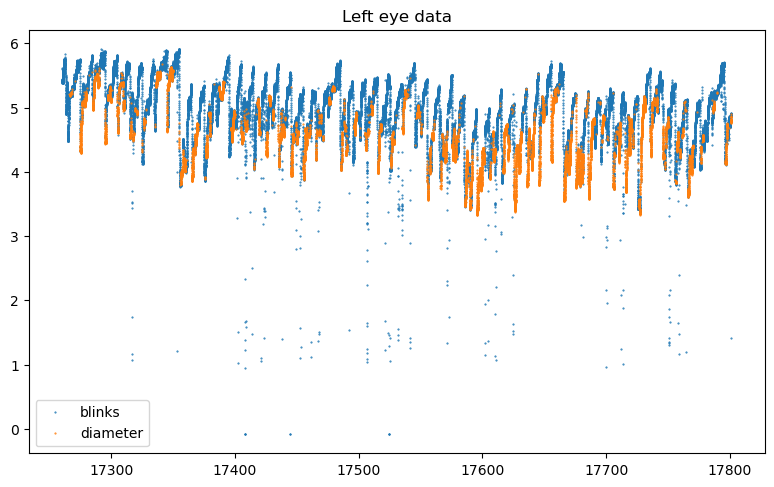

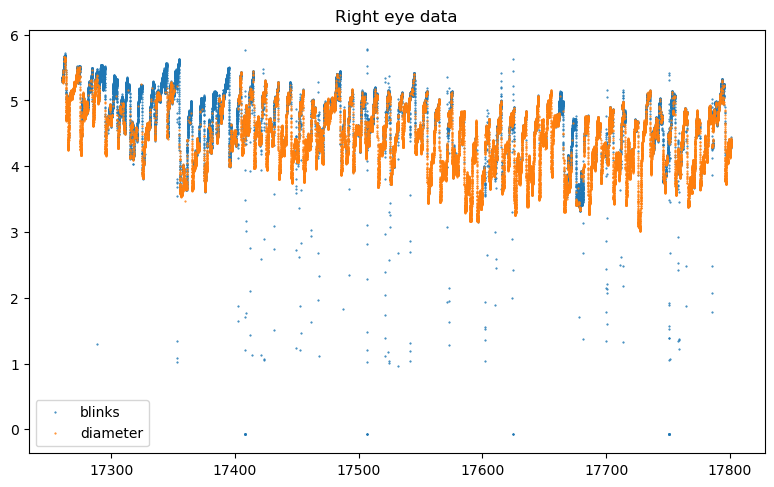

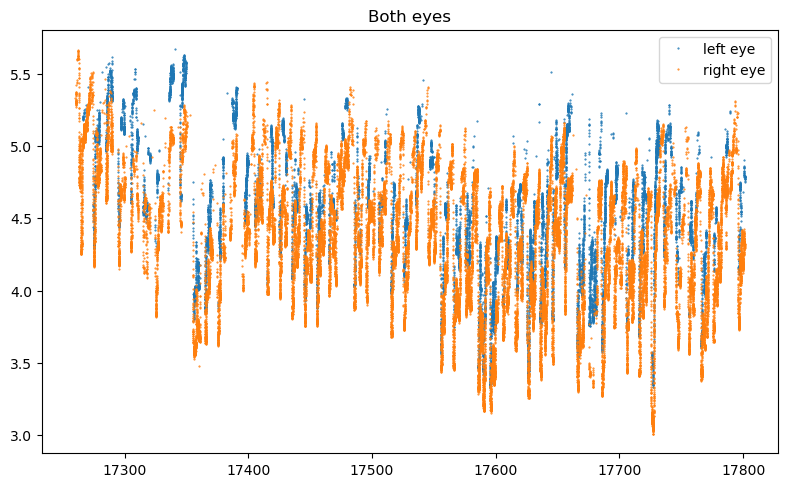

In [79]:
%matplotlib inline
#for left eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_left_eye['pupil_timestamp'],blinks_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Left eye data')

#for right eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_right_eye['pupil_timestamp'],blinks_right_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Right eye data')

fig, ax=plt.subplots(1,1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['left eye','right eye'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Both eyes')



### Do cubic splines aeasily, in the future use a better blink detection algorithm

In [80]:
%matplotlib qt


fig, ax = plt.subplots(2,1,figsize=(15, 8))
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d'], 'o', label='data')
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[0].legend(loc='lower right', ncol=2)
ax[0].set_title('left eye')
ax[0].set_xlabel('sample')
ax[0].set_ylabel('diameter (mm)')


ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d'], 'o', label='data')
ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_title('right eye')
ax[1].set_xlabel('sample')
ax[1].set_ylabel('diameter (mm)')
fig.tight_layout()

usaing smooting splines

## 

In [81]:
time_col_str='timestamp_s'
signal_str='diameter_3d'
sns.set_theme()

%matplotlib qt
fig1, ax=plt.subplots(1,)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig1.set_size_inches((18, 5.5))

fig2, ax=plt.subplots(1)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events_surprise].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig2.set_size_inches((18, 5.5))

# plt.tight_layout()

## Apply normalizations


### Create different normalization columns

In [82]:
pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_left_eye['diameter_3d_z_score']=nm.normalize(values=pupil_left_eye['diameter_3d'],
                                            type='z_score')

pupil_right_eye['diameter_3d_z_score']=nm.normalize(values=pupil_right_eye['diameter_3d'],
                                            type='z_score')
pupil_left_eye.head()

C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\2016220940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
C:\Users\arturoV\AppData\Local\Temp\ipykernel_29496\2016220940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
C:\Users\arturoV\AppData\L

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,on_surf,timestamp_s,diameter_3d_z_score
20520,17266.109968,3301,1,1.0,0.628825,0.577913,50.141990,pye3d 0.3.0 real-time,120.734345,81.040645,...,2.002714,-2.221915,152.69252,118.215489,171.142861,171.142861,0.0,True,0.000000,1.512158
20549,17266.165948,3304,1,1.0,0.629681,0.576560,50.195544,pye3d 0.3.0 real-time,120.898742,81.300393,...,2.000806,-2.214940,152.69252,118.215489,171.142861,171.142861,0.0,True,0.055981,1.520560
20596,17266.261956,3310,1,1.0,0.629657,0.575844,50.156195,pye3d 0.3.0 real-time,120.894078,81.438040,...,2.000123,-2.209341,152.69252,118.215489,171.142861,171.142861,0.0,True,0.151989,1.512767
20601,17266.269940,3311,1,1.0,0.629350,0.575521,50.066825,pye3d 0.3.0 real-time,120.835278,81.499947,...,1.998765,-2.210690,152.69252,118.215489,171.142861,171.142861,0.0,True,0.159973,1.492912
20608,17266.285953,3312,1,1.0,0.629690,0.575798,50.190922,pye3d 0.3.0 real-time,120.900562,81.446717,...,2.000146,-2.209404,152.69252,118.215489,171.142861,171.142861,0.0,True,0.175986,1.520284


### Filters

In [83]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 

filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')


### Asset normalization

In [84]:
#common variables for analysis
pupil_df=pupil_left_eye
signal_str='diameter_3d_z_score'
secons_norm=0.05 # preestimulus frame to normalize
window_s=2.7  # winsow of interest 

# pupil_df['speed']=abs(pupil_df['diameter_3d'].diff(periods=100).rolling(3).median())

frames_norm=np.round(secons_norm*pupil_sampling_freq_left).astype(int)
win_norm=range(frames_norm)
print('Initial frames used for normalization = {} correspond to {}s'.format(frames_norm,secons_norm))

window_frames=np.round(window_s*pupil_sampling_freq_left).astype(int)
print('Windows frames of interest   = {} correspond to {}s'.format(window_frames,window_s))
window=range(0,window_frames)
time_x=np.linspace(0,window_s,window_frames)



Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 338 correspond to 2.7s


In [85]:
# For Assets only window size data
event=annotations_pd.loc[filter_events,['label']].values.flatten()
# event=annotations_pd['label'].values.flatten()
data_dict=dict([(key,[None]) for key in event])# dict with empty keys 

pupil_diameter_df=pd.DataFrame()#pd.DataFrame(data_dict,index=np.arange(0,800))
data_list=[]
for num,im in enumerate(event):
    initial_anotation,end_anotation,index_annotation=cm.extract_annotations_timestamps(im,'label',annotations_pd)
    segmented_df=cm.filter_rows_by_temporal_values(
        dataframe=pupil_df,
        time_column='pupil_timestamp',
        ini_value=initial_anotation['timestamp'].values[0],
        end_value=end_anotation['timestamp'].values[0]
        )
    
    segmented_df=segmented_df.iloc[window]
    win_blank=segmented_df.iloc[win_norm]
    asset_norm=segmented_df[signal_str]-win_blank[signal_str].mean()
    asset_raw=segmented_df[signal_str]
    data_dict[im]=asset_norm.values
pupil_diameter_df=pd.DataFrame(data_dict)


IndexError: positional indexers are out-of-bounds

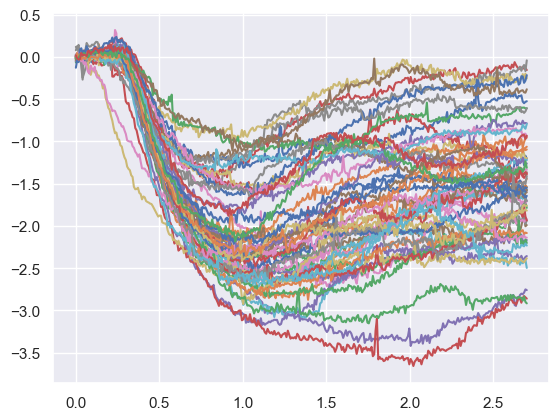

In [ ]:
%matplotlib inline
df_plot=pupil_diameter_df
plt.plot(time_x,df_plot)


### With thius new data format i can easily filter out assets with z_scores higher than 2

In [ ]:
pupil_diameter_df.describe()

,Asset0015.tif,Asset0034.tif,Asset0004.tif,Asset0010.tif,Asset0048.tif,Asset0026.tif,Asset0044.tif,Asset0016.tif,Asset0040.tif,Surprise02.tif,...,Asset0030.tif,Asset0033.tif,Asset0002.tif,Asset0046.tif,Asset0024.tif,Asset0001.tif,Asset0008.tif,Asset0006.tif,Asset0042.tif,Asset0037.tif
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,-1.471837,-1.777282,-1.636416,-0.527890,-2.382682,-1.756902,-1.647851,-0.619940,-0.410995,-1.862678,...,-1.346348,-1.438605,-1.783568,-1.843234,-1.699272,-1.941493,-1.432290,-1.456553,-1.243791,-1.058488
std,0.727714,0.861492,0.768729,0.467798,1.182233,0.762807,0.860109,0.449999,0.303965,0.935358,...,0.662938,0.670075,0.591486,0.794662,0.736487,0.815071,0.638412,0.693360,0.607605,0.535949
min,-2.376506,-2.874832,-2.421388,-1.425622,-3.420810,-2.444661,-2.714353,-1.532724,-0.975330,-3.085836,...,-2.300894,-2.186364,-2.386084,-2.660594,-2.411859,-2.700569,-2.213850,-2.358363,-2.183982,-1.879968
25%,-2.095354,-2.481685,-2.249598,-0.948866,-3.208874,-2.219396,-2.381679,-0.960393,-0.717720,-2.666480,...,-1.903463,-2.030934,-2.197733,-2.347409,-2.080230,-2.540644,-1.835016,-2.005604,-1.577440,-1.370476
50%,-1.451190,-1.817188,-1.798063,-0.435482,-2.990271,-2.099051,-1.786905,-0.530622,-0.305200,-1.868787,...,-1.272734,-1.563586,-1.949963,-2.145657,-2.010019,-2.232447,-1.558702,-1.576635,-1.346459,-1.145365
75%,-1.342494,-1.557362,-1.540092,-0.174598,-1.877979,-1.821323,-1.319054,-0.309507,-0.168620,-1.608168,...,-1.186016,-1.133100,-1.691026,-1.799159,-1.764134,-1.870840,-1.494010,-1.159693,-1.023469,-0.939212
max,0.121228,0.077496,0.102082,0.219558,0.147638,0.043552,0.112587,0.127193,0.050949,0.053202,...,0.061480,0.080343,0.049778,0.143626,0.048612,0.012702,0.133752,0.067680,0.084727,0.147697


### Do the plots

In [ ]:
np.median(pupil_diameter_df,axis=1)

array([-4.75593427e-03,  9.29665333e-03,  1.04813637e-02, -4.34672175e-03,
        3.22637288e-04,  2.10328999e-03,  7.95427886e-03,  1.02252638e-02,
        1.26460782e-02, -3.45874457e-03,  3.26963782e-03,  1.02807597e-02,
        1.15435109e-02,  1.22395084e-02,  8.97876364e-03,  1.51918518e-02,
        1.86535814e-02,  2.06340959e-02,  2.29859599e-02,  1.07680561e-02,
        1.37529821e-02,  1.62098956e-02,  7.43693278e-03,  2.42224840e-02,
        2.19467963e-02,  1.96638359e-02,  1.97181000e-02,  9.67496616e-03,
        1.60098054e-02,  1.10000918e-02,  1.87110859e-02,  2.46931334e-02,
        2.49831296e-02,  1.70175625e-02,  2.38364124e-04,  3.03776736e-03,
        4.52035102e-04, -1.50269011e-02, -3.64634811e-02, -4.22817406e-02,
       -8.79528374e-02, -1.29845867e-01, -1.45425796e-01, -2.05855000e-01,
       -2.24242925e-01, -2.65445926e-01, -3.18798267e-01, -3.65920005e-01,
       -4.17583950e-01, -4.56950391e-01, -5.13947052e-01, -5.55491189e-01,
       -5.85243629e-01, -

In [ ]:

mat=pupil_diameter_df.reindex(columns=
                                  even_asset).values
mat[window]


array([[-0.00411789, -0.0053702 , -0.06676297, ...,  0.00626177,
        -0.01451253,  0.01089036],
       [ 0.03081067,  0.01110961, -0.0354997 , ...,  0.03666657,
        -0.02382036, -0.0235171 ],
       [ 0.00185772, -0.01305556,  0.04982596, ..., -0.0320095 ,
        -0.01423603, -0.03579131],
       ...,
       [-1.13012401, -1.42819747, -1.57400414, ..., -0.85475163,
        -1.38210495, -1.03908303],
       [-1.09413566, -1.39047578, -1.5692077 , ..., -0.89537662,
        -1.36417199, -1.06159128],
       [-1.08509903, -1.41624087, -1.55401996, ..., -0.83215316,
        -1.3433952 , -1.05810791]])

## Now lets calculate the speed of change from the normalized data

Exclude data that is over [2,-2] z scores


NameError: name 'pupil_zscore' is not defined

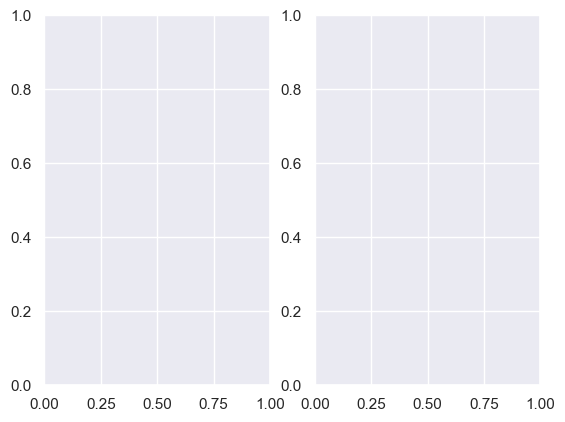

In [ ]:
fig,ax=plt.subplots(1,2)
sns.histplot(pupil_zscore[window,6],ax=ax[0])
sns.histplot(pupil_events_matrix[window,6],ax=ax[1])

In [ ]:
#test sfuntion
sigma=1
mu=10
data_normal=sigma*np.random.randn(70,100) +mu
data_norm=nm.normalize(values=data_normal.reshape(data_normal.size),
                                            type='z_score').reshape(data_normal.shape)
plt.plot(data_normal,'.',color='red')
plt.plot(data_norm,'.',color='blue')
plt.plot(data_normal-10,'.',color='green')


In [ ]:
plt.hist(data_normal)


In [ ]:
pupil_events_matrix.shape[0]

In [ ]:
r=a.reshape(pupil_events_matrix.shape)

In [ ]:
pupil_events_matrix.shape[0]*pupil_events_matrix.shape[1]

In [ ]:
pupil_events_matrix.shape

In [ ]:
# pupil_list=[]
# surface_list=[]
# ref_col=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]

# for row in range(20,200):#(surfaces_pd_frame.shape[0]-1):
#         ini_val=surfaces_pd_frame.iloc[row,ref_col]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col]
#         surface_row=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )
#         aux_pd_frame.insert(0,'horizontal_index',row)
#         surface_row.insert(0,'horizontal_index',row)
#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffisx='sur_',how='cross')

#         pupil_list.append(aux_pd_frame)
#         surface_list.append(surface_row)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)
        
# vert_stack=pd.concat(pupil_list,axis=0)
# horz_stack=pd.concat(surface_list,axis=0)
# vert_stack.head()
# final_df=[]
# for row,index in surfaces_pd_frame.iterrows():
#         ini_val=surfaces_pd_frame.iloc[row]['gaze_timestamp']
#         end_value=surfaces_pd_frame.iloc[row+1]['gaze_timestamp']
#         to_join=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )

#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffix='sur_',how='cross')
#         final_df.append(aux_pd_frame)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)


In [ ]:
df_A = pd.DataFrame({'start_date':['2017-03-27','2017-01-10'],'end_date':['2017-04-20','2017-02-01']})
df_B = pd.DataFrame({'event_date':['2017-01-20','2017-01-27'],'price':[100,200]})

df_A['end_date'] = pd.to_datetime(df_A.end_date)
df_A['start_date'] = pd.to_datetime(df_A.start_date)
df_B['event_date'] = pd.to_datetime(df_B.event_date)
df_B

,event_date,price
0,2017-01-20,100
1,2017-01-27,200


In [ ]:
df_merge = df_A.merge(df_B, how='cross')
df_merge

,start_date,end_date,event_date,price
0,2017-03-27,2017-04-20,2017-01-20,100
1,2017-03-27,2017-04-20,2017-01-27,200
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
df_merge = df_merge.query('event_date >= start_date and event_date <= end_date')
df_merge

,start_date,end_date,event_date,price
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
surfaces_pd_frame['event']=np.arange(len(surfaces_pd_frame))
# idx = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'], df_2['end'], closed='both')

In [ ]:
surfaces_pd_frame.index = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'],surfaces_pd_frame['end'],closed='both')
surfaces_pd_frame

,world_timestamp,world_index,gaze_timestamp,x_norm,y_norm,x_scaled,y_scaled,on_surf,confidence,start,end,event
"[14963.464168400002, 14963.468149400003]",14963.529049,0,14963.464168,0.390105,-0.042263,0.390105,-0.042263,False,0.990000,14963.464168,14963.468149,0
"[14963.468149400003, 14963.472153400002]",14963.529049,0,14963.468149,0.385552,-0.102956,0.385552,-0.102956,False,0.990000,14963.468149,14963.472153,1
"[14963.472153400002, 14963.476132400005]",14963.529049,0,14963.472153,0.379080,-0.151352,0.379080,-0.151352,False,0.990000,14963.472153,14963.476132,2
"[14963.476132400005, 14963.4801314]",14963.529049,0,14963.476132,0.373581,-0.219004,0.373581,-0.219004,False,0.990000,14963.476132,14963.480131,3
"[14963.4801314, 14963.4841224]",14963.529049,0,14963.480131,0.366127,-0.282971,0.366127,-0.282971,False,0.990000,14963.480131,14963.484122,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"[15616.681685400004, 15616.685702400002]",15616.684612,38927,15616.681685,0.353888,0.368990,0.353888,0.368990,True,0.918658,15616.681685,15616.685702,159420
"[15616.685702400002, 15616.6896554]",15616.684612,38927,15616.685702,0.333188,0.345879,0.333188,0.345879,True,0.937488,15616.685702,15616.689655,159421
"[15616.6896554, 15616.693664400002]",15616.684612,38927,15616.689655,0.321895,0.354199,0.321895,0.354199,True,0.937488,15616.689655,15616.693664,159422
"[15616.693664400002, 15616.697709400005]",15616.700605,38928,15616.693664,0.296020,0.369735,0.296020,0.369735,True,0.913507,15616.693664,15616.697709,159423


In [ ]:
pupil_pd_frame['event'] = pupil_pd_frame['pupil_timestamp'].apply(lambda x : surfaces_pd_frame.iloc[surfaces_pd_frame.index.get_loc(x)]['event'])

KeyError: 15616.703703400002